In [29]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sym

$\textbf{3. Pasos intermedios para encontrar la regla de Simpson simple}  $  
Para la regla de Simpson simple se toma una función $f(x)$ y se divide en areas dadas por tres puntos en la gráfica, de aquí se obtiene una figura compuesta por un trapecio y la curvatura de una parábola, como se observa en la siguiente figura. 

El area para la figura dada se divide en dos partes: 
$$
A_{total}=A_{curvatura}+A_{trapecio}
$$

Según la formula de cuadratura para parabola de arquimedes, se sabe que posee la siguiente relación con el area del triangulo. 
$$
A_{curvatura}=\frac{4}{3}\times A_{triangulo}
$$

Por ende la primera ecuación se puede escribir como: 
$$
A_{total}=\frac{4}{3}\times A_{triangulo}+A_{trapecio}
$$

Por otro lado la ecuación de area para el trapecio que se forma es: 
$$
A_{trapecio}=\frac{4}{3}(h_{1}+ h_{2})\times \Delta x
$$

Por ende al tomar el area de los triangulos como la resta de dos trapecios, se puede reescribir la formula como: 
$$
A_{total}=\frac{1}{3}\times ( \frac{4}{2}(y_{1}+ y_{2})\times \Delta x + \frac{4}{2}(y_{2}+ y_{3})\times \Delta x - (y_{1}+ y_{3})\times \Delta x)
$$

Por ende al simplificar: 
$$
A_{total}=\frac{\Delta x}{3}\times (y_{1}+4y_{2}+y_{3})
$$

Esta sumatoria se puede extender para el area total requerida de toda la función, adicionando los siguientes tres terminos de altura, es decir $y$

$\textbf{4. Verificación de la fórmula del error en el método de Simpson}$  

El error en el método de Simpson simple $\frac{1}{3} $ para una integral definida $ I = \int_a^b f(x) \, dx $ está dado por la fórmula:

$$
E = \frac{(b-a)^5}{2880} f^{(4)}(\xi), \quad \text{para algún} \ \xi \in [a,b]
$$

Esta expresión se obtiene al aproximar la función $( f(x) )$ por un polinomio cuadrático, construido a partir de los valores $( f(a) ), ( f\left( \frac{a + b}{2} \right) ) \text{ y } ( f(b) )$.

La interpolación utiliza un polinomio de grado 2, lo que significa que los términos de error no se deben a la función en sí, sino a la diferencia entre la función y el polinomio que la aproxima. Este error se puede analizar utilizando la expansión en serie de Taylor de \( f(x) \), dada por:

$$
f(x) = f(x_0) + f'(x_0)(x - x_0) + \frac{f''(x_0)}{2!}(x - x_0)^2 + \frac{f^{(3)}(x_0)}{3!}(x - x_0)^3 + \frac{f^{(4)}(x_0)}{4!}(x - x_0)^4 + \cdots
$$

Dado que el polinomio cuadrático de Simpson captura los términos de orden 0, 1 y 2 de la serie de Taylor, el error está relacionado con los términos que no son aproximados por este polinomio. El término cúbico se cancela debido a la simetría del método de Simpson, lo que hace que el primer término que contribuye al error sea el de la **cuarta derivada** de la función, $ f^{(4)}(xi) $.

Por lo tanto, el error es proporcional a la cuarta derivada de $( f(x) )$ evaluada en algún punto $ xi $ del intervalo $ [a, b] $, así como a la quinta potencia de la longitud del intervalo $ (b - a) $. Esto justifica la expresión del error en la fórmula $ (4.109) $.

$$
E = \frac{(b-a)^5}{2880} f^{(4)}(\xi)
$$


$\textbf{5. Resolver integral}$

In [30]:
x=sym.symbols("x")
y=sym.exp(-x)

integral=sym.integrate(y,(x,0,1))
integral


1 - exp(-1)

In [31]:
b=1
a=0
h=0.005
x_v=np.arange(a,b,h)

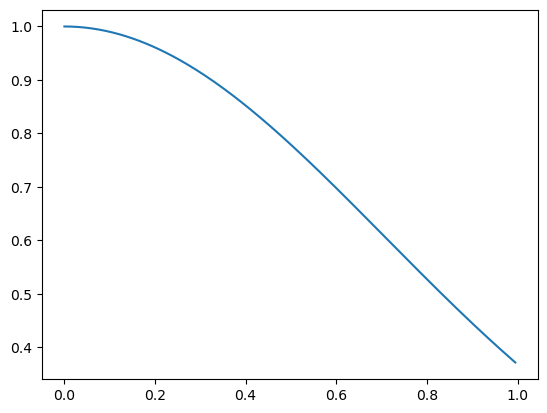

In [32]:
f = lambda X: np.exp(-X**2)
f_x=f(x_v)

plt.plot(x_v,f_x)

In [33]:
integral = (h / 2) *(f(a)+f(b))+h*np.sum(f_x[1:-1])
integral

0.7449647629715405

$\textbf{6. Encontrar la inductancia exacta}$

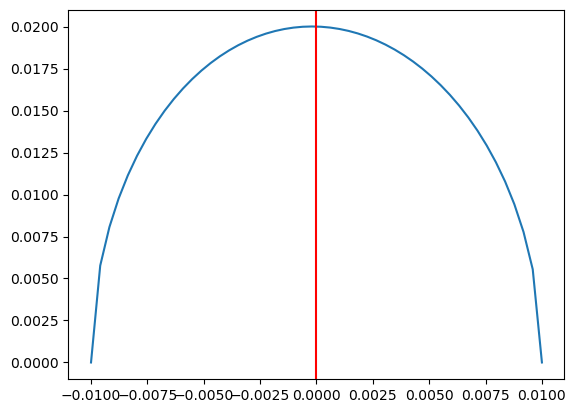

In [34]:
R=0.5
a=0.01
x=np.linspace(-a,a)

I=lambda x,a=0.01,R=0.5:(np.sqrt(a**2-x**2))/(R+x)
f_I=I(x)

plt.plot(x,f_I)
plt.axvline(0,color="red")

In [35]:
#Método de trapecio
def trapezoide(f,a,b,n):
    h=(b-a)/n
    valor=(f(a)+f(b))*h*(1/2)
    for i in range(1,n):
        valor+=h*f(a+i*h)
    return valor

trapezoide(I,-a,0,200)*2

0.0003168153456051967

In [36]:
def simpson(a, b, n=200): 
    if n % 2 == 0:
        n += 1  
    
    h = (b - a) / n
    x = np.linspace(a, b, n)
    y = I(x)
    
    integral = (h / 3) * (y[0] + 2 * np.sum(y[2:n:2]) + 4 * np.sum(y[1:n+1:2]) + y[-1])
    return integral

simpson(-a,0)*2

0.0003165915842424438

$\textbf{7. Integral doble}$


In [65]:
Volumen=lambda x,y,R=1: np.sqrt(-x**2-y**2+R**2)

C:\Users\aleja\AppData\Local\Temp\ipykernel_6896\3880439000.py:1: RuntimeWarning: invalid value encountered in sqrt
  Volumen=lambda x,y,R=1: np.sqrt(-x**2-y**2+R**2)


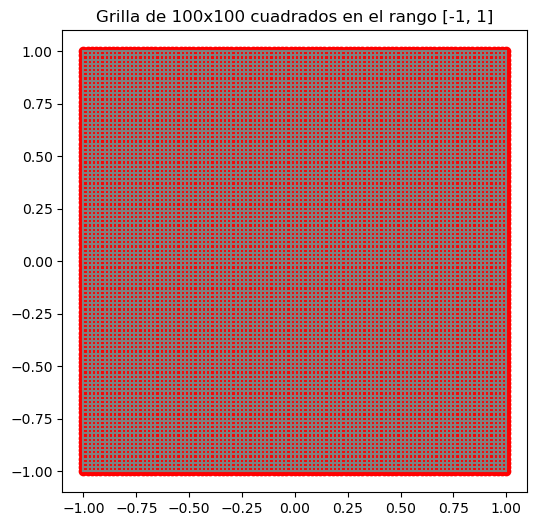

In [66]:
R=1
n=100
coordenadas=np.linspace(-R,R,n+1)
x,y=np.meshgrid(coordenadas,coordenadas)
z = Volumen(x, y)

plt.figure(figsize=(6,6))
plt.plot(x, y, color='gray')  
plt.plot(x.T, y.T, color='gray')  
plt.scatter(x, y, color='red')  # Puntos de la grilla
plt.title(f'Grilla de {n}x{n} cuadrados en el rango [-{R}, {R}]')
plt.show()

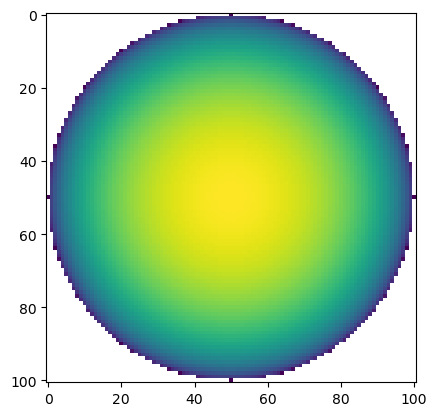

In [67]:
plt.imshow(z)

In [68]:
Volumen=lambda x,y,R=1: np.sqrt(x**2+y**2+R**2)
x,y=np.meshgrid(coordenadas,coordenadas)

a=(-R,R)
b=(0,2*np.pi)
n=10



In [69]:
a=(-R,R)
b=(0,2*np.pi)
n=10

Volumen=lambda x,y,R=1: np.sqrt(x**2+y**2+R**2)

def doble_integral(f,a,b,n):
    hx=float((a[1]-a[0])/n)
    hy=float((b[1]-b[0])/n)

    Integral=0

    for i in range(n):
        for j in range(n):
            xi=a[0]+hx/2+i*hx
            yi=b[0]+hy/2+j*hy
            Integral+=hx*hy*f(xi,yi)

    return Integral

doble_integral(Volumen,a,b,n)


43.27803722540772

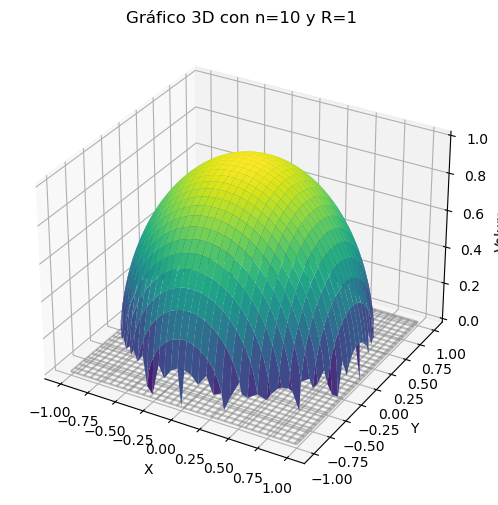

In [70]:
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(x, y, z, cmap='viridis')

ax.plot_wireframe(x, y, np.zeros_like(z), color='gray', alpha=0.5)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Volumen')
ax.set_title(f'Gráfico 3D con n={n} y R={R}')

plt.show()